<a href="https://colab.research.google.com/github/shas043/Face-recognition/blob/master/Facial_recognition_with_facial_recognition_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context** The following project is for identifying a perticular face (who the person is) from a mixed group of different faces. Each image has a single face. There are two datasets in the working diretory namely known faces, containing identity images and unknown faces having a bunch of unknown faces.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Deep Learning/Face Recognition')
!ls

known_faces  unknown_faces


In [0]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 98kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=b228ec44b0ce776f377679993d4d5994f3e12cad160ddcee99a1204508236218
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
# import libraries
import face_recognition
import os
import cv2

In [0]:
pwd #gets the current working directory

'/content/drive/My Drive/Deep Learning/Face Recognition'

In [0]:
#declare variables
KNOWN_FACES_DIR="known_faces"
UNKNOWN_FACES_DIR="unknown_faces"
TOLERANCE = 0.6
FRAME_THICKNESS=3
FONT_THICKNESS=2
MODEL="cnn"

In [0]:
print('loading known faces')

loading known faces


In [0]:
known_faces=[]
known_names=[]

In [0]:
#iterate over all the known faces and store that information/encodings
for i in os.listdir(KNOWN_FACES_DIR):
    #to iterate over all the images in that dir
    for filename in os.listdir(f"{KNOWN_FACES_DIR}/{i}"):
        image=face_recognition.load_image_file(f"{KNOWN_FACES_DIR}/{i}/{filename}")
        encoding=face_recognition.face_encodings(image)[0]
        known_faces.append(encoding)
        known_names.append(i)
       

In [0]:
print('processing unknown images')

processing unknown images


In [0]:
from google.colab.patches import cv2_imshow

Now we will iterate over all the unknown images, find all the faces and compare each unknown face with the known faces.

elon musk33.jpg
match found:ElonMusk


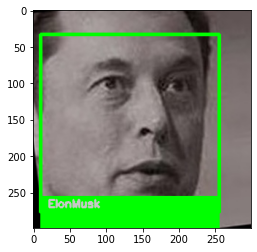

elon musk21.jpg
match found:ElonMusk


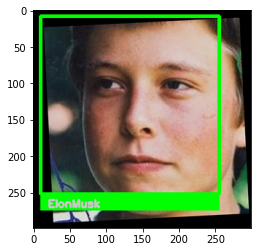

jeff bezos62.jpg
match not found


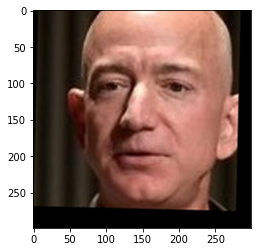

bill gates13.jpg
match not found


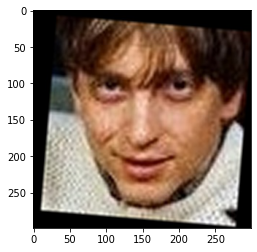

Paul Rudd34.jpg
match not found


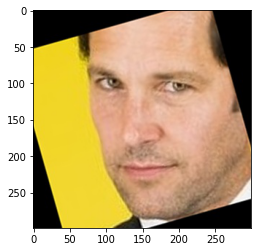

anne hathaway28.jpg
match not found


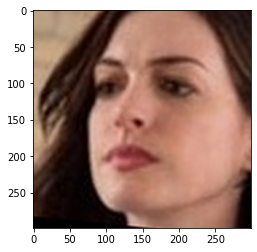

Bryan Cranston40_1200.jpg
match not found


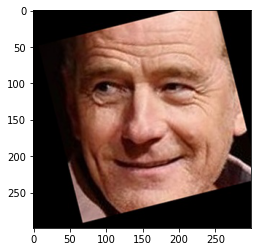

Benedict Cumberbatch21.jpg
match not found


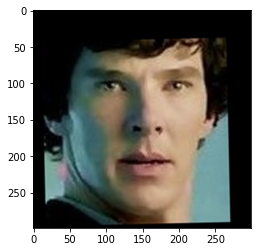

jeff bezos28.jpg
match not found


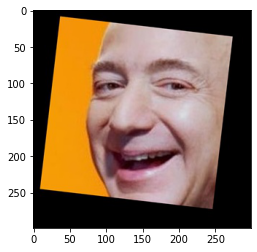

Morgan Freeman30_572.jpg
match not found


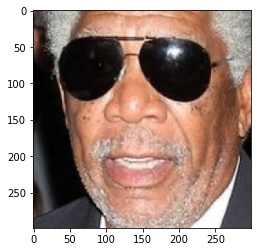

Aaron Paul36_218.jpg
match not found


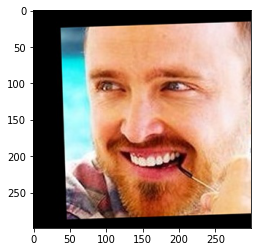

elon musk65.jpg
match found:ElonMusk


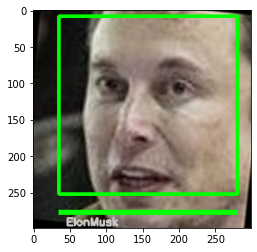

brie larson19.jpg
match not found


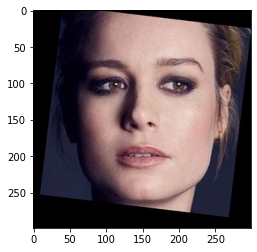

Tom Cavanagh30.jpg
match not found


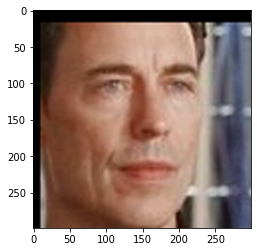

Neil Patrick Harris16.jpg
match not found


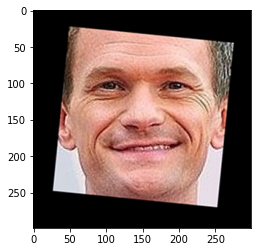

elon musk9.jpg
match found:ElonMusk


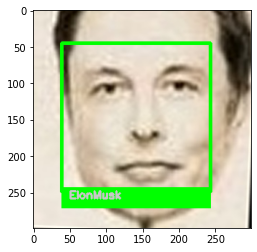

mark zuckerberg10.jpg
match not found


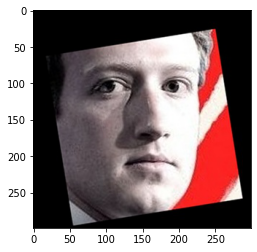

Dwayne Johnson67.jpg
match not found


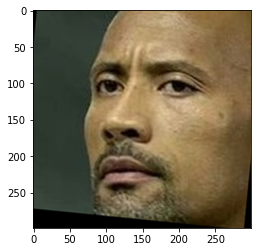

elon musk15.jpg
match found:ElonMusk


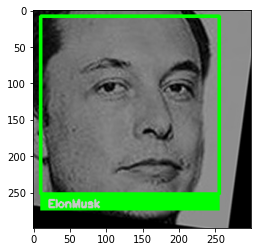

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
for i in os.listdir(UNKNOWN_FACES_DIR):
    print(i)
    image=face_recognition.load_image_file(f"{UNKNOWN_FACES_DIR}/{i}")
    locations=face_recognition.face_locations(image, model=MODEL)
    encodings=face_recognition.face_encodings(image, locations)
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    for face_encoding, face_location in zip(encodings, locations):
        results=face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)
        match=None
        if True in results:
            match = known_names[results.index(True)]
            print(f"match found:{match}")
            
            top_left=(face_location[3], face_location[0])
            bottom_right=(face_location[1], face_location[2])
            
            color=[0,255,0]
            cv2.rectangle(image, top_left, bottom_right, color, FRAME_THICKNESS)
            
            #small rectangle at the bottom of the big rectangle to hold the text 
            top_left=(face_location[3], face_location[1])
            bottom_right=(face_location[1], face_location[2]+22)
            cv2.rectangle(image, top_left, bottom_right, color, cv2.FILLED)
            cv2.putText(image, match, (face_location[3]+10, face_location[1]+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200,200,200), FONT_THICKNESS)
          
        elif False in results:
          print(f"match not found")  
    imgrgb=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(imgrgb)
    plt.show()
    #cv2.imshow(filename, image) #this crashes the jupyter server so using plt.show instead
    #cv2.waitKey(2000)